# Part 3

You are given a list of integers, A, and another integer s. Write an algorithm that outputs all the pairs in A that equal s.
For example, if
A = [7, -2, 8, 2, 6, 4, -7, 2, 1, 3, -3] and s = 4
the algorithm should output: (7, -3), (-2, 6), (2, 2), (3, 1).

In [1]:
from random import randint

The easy way to solve the problem would be implementing a brute force method, which would lead to a complexity equal to $O(n^2)$.\
We managed to implement an algorithm that, making use of sort method of a list ($O(n\, log(n)$) and a cycle in which we use two indexes (more details in the code, below) solves the problem in $O(n\, log(n))$ [removing constants].

In [2]:
def findPairs(A,s):
    pairs=[]
    A.sort                                   #First sort the array O(nlogn)
    start=0                                  #We define 2 indexes to go through the list A, and verify wheter the sum
    end=len(A)-1                             #of A[index1=start]+A[index2=end] is equal to the given sum, in the case it
                                             #is we store the value and keep looking for other values
                                             #if it's not we check if that's greater or not of the given sum:
    while start<end:                         #in the case it is we decrease the second index (end) while in the other
                                             #case we increase the first index (start)
        if A[start]+A[end]==s: 
            pairs.append((A[start],A[end]))
            start+=1
    
        elif A[start]+A[end]<s:
            start+=1
            
        else:
            end-=1
            
    return pairs

In [3]:
N=10
for i in range(5):
    A=[]
    if i!=0: N*=10
    for i in range(N):
        A.append(randint(-50, 50))
    print(N)
    %timeit pairs=findPairs(A,10)

10
2.04 µs ± 46.1 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
100
21 µs ± 133 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
1000
221 µs ± 1.05 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
10000
2.29 ms ± 35.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
100000
23.1 ms ± 150 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


# Part 1

## 1.1

In [4]:
import numpy as np      
import matplotlib.pyplot as plt 
import scipy.io.wavfile 
import subprocess
import librosa
import librosa.display
import IPython.display as ipd

from pathlib import Path, PurePath   
from tqdm.notebook import tqdm

import random
import pandas as pd
import os

In [5]:
def convert_mp3_to_wav(audio:str) -> str:  
    """Convert an input MP3 audio track into a WAV file.

    Args:
        audio (str): An input audio track.

    Returns:
        [str]: WAV filename.
    """
    if audio[-3:] == "mp3":
        wav_audio = audio[:-3] + "wav"
        if not Path(wav_audio).exists():
                subprocess.check_output(f"ffmpeg -i {audio} {wav_audio}", shell=True)
        return wav_audio
    
    return audio

def plot_spectrogram_and_picks(track:np.ndarray, sr:int, peaks:np.ndarray, onset_env:np.ndarray) -> None:
    """[summary]

    Args:
        track (np.ndarray): A track.
        sr (int): Aampling rate.
        peaks (np.ndarray): Indices of peaks in the track.
        onset_env (np.ndarray): Vector containing the onset strength envelope.
    """
    times = librosa.frames_to_time(np.arange(len(onset_env)),
                            sr=sr, hop_length=HOP_SIZE)

    plt.figure()
    ax = plt.subplot(2, 1, 2)
    D = librosa.stft(track)
    librosa.display.specshow(librosa.amplitude_to_db(np.abs(D), ref=np.max),
                            y_axis='log', x_axis='time')
    plt.subplot(2, 1, 1, sharex=ax)
    plt.plot(times, onset_env, alpha=0.8, label='Onset strength')
    plt.vlines(times[peaks], 0,
            onset_env.max(), color='r', alpha=0.8,
            label='Selected peaks')
    plt.legend(frameon=True, framealpha=0.8)
    plt.axis('tight')
    plt.tight_layout()
    plt.show()

def load_audio_picks(audio, duration, hop_size):
    """[summary]

    Args:
        audio (string, int, pathlib.Path or file-like object): [description]
        duration (int): [description]
        hop_size (int): 

    Returns:
        tuple: Returns the audio time series (track) and sampling rate (sr), a vector containing the onset strength envelope
        (onset_env), and the indices of peaks in track (peaks).
    """
    try:
        track, sr = librosa.load(audio, duration=duration)
        onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
        peaks = librosa.util.peak_pick(onset_env, 10, 10, 10, 10, 0.5, 0.5)
    except Error as e:
        print('An error occurred processing ', str(audio))
        print(e)

    return track, sr, onset_env, peaks

### Settings

In [66]:
N_TRACKS = 1413
HOP_SIZE = 512
DURATION = 30 # TODO: to be tuned!
THRESHOLD = 0 # TODO: to be tuned!

In [67]:
data_folder = Path("Part1/archive/mp3s-32k/")
mp3_tracks = data_folder.glob("*/*/*.mp3")
tracks = data_folder.glob("*/*/*.wav") 

### Preprocessing

In [ ]:
for track in tqdm(mp3_tracks, total=N_TRACKS):
    convert_mp3_to_wav(str(track))

### Audio signals

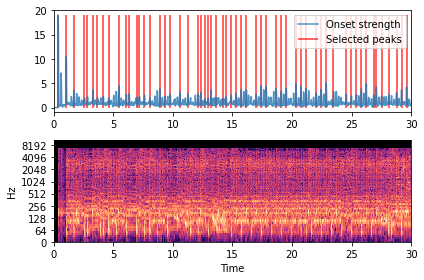

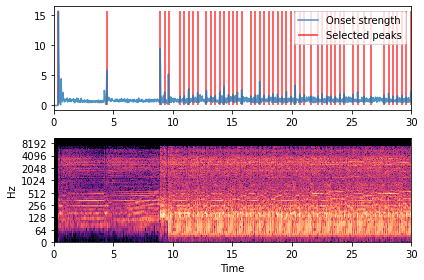

In [32]:
for idx, audio in enumerate(tracks):
    if idx >= 2:
        break
    track, sr, onset_env, peaks = load_audio_picks(audio, DURATION, HOP_SIZE)
    plot_spectrogram_and_picks(track, sr, peaks, onset_env)

In [8]:
songs=[]
all_peaks=[]
onset=[]
for ind,audio in tqdm(enumerate(tracks)):
    track, sr, onset_env, peaks = load_audio_picks(audio, DURATION, HOP_SIZE)
    songs.append(track)
    all_peaks.append(peaks)
    onset.append(onset_env)

0it [00:00, ?it/s]

In [9]:
print(len(songs),len(all_peaks),len(onset))

1413 1413 1413


In [243]:
#SAVE DATA
s=open('songs.pkl','w')
p=open('peaks.pkl','w')
o=open('onset.pkl','w')

for i in range(len(songs)):
    s.write(str(songs[i]).replace('\n','')+'\n')
    p.write(str(all_peaks[i]).replace('\n','')+'\n')
    o.write(str(onset[i]).replace('\n','')+'\n')
    

s.close()
p.close()
o.close()

## 1.2

In [210]:
#I need to create a dictionary with all the 'words'(values) appearing in peaks
def create_corpus(corpus, array):
    for value in array:
        if value not in corpus:
            corpus.update({value:0})
    return

In [211]:
corpus={}
for i in range(len(all_peaks)):
    create_corpus(corpus,all_peaks[i])

In [212]:
len(corpus)

1287

In [213]:
#and use it to transform our initial vector in a vector in which we have 1 if the element of the all_peaks[i] array 
#is equal to a key of the corpus
def create_01vector(array,dictionary):
    dictionary=dict.fromkeys(dictionary, 0)
    for value in array:
        if value in dictionary:
            dictionary[value] = 1
        else:
            raise('value not in dictionary')
    return np.array(list(dictionary.values()))

In [214]:
peaks_01=[]
for i in range(len(all_peaks)):
    peaks_01.append(create_01vector(all_peaks[i],corpus))

In [215]:
print(len(peaks_01[0]),len(peaks_01)) #so here we have 1413 vectors, each with 1287 components

1287 1413


In [216]:
def first1(array): #returns the index of the first non zero element of a np.array
    return np.where(array==1)[0][0]

In [217]:
def minHash(array,n_perms): #return list with indexes of first element of the given array
    
    indexes=[]
    random.seed(42) #set seed so we are applying the same transformation to the vectors when iterating(see later)
    
    for i in range(n_perms):
        random.shuffle(array)
        indexes.append(first1(array))
        #print(random.shuffle(first1(array)[i]))
    return indexes

In [258]:
#now save in an array the values we get applying minHash on the whole list of vectors
new_indexes=[]
for i in tqdm(range(len(peaks_01))): #new_indexes will have as elements the columns of the signature matrix 
    indexes=minHash(peaks_01[i], n_perms=600) #we are trying to reduce the dimensions by a factor ~6, 
    new_indexes.append(indexes)               #that's why 200 perms

  0%|          | 0/1413 [00:00<?, ?it/s]

In [220]:
print(len(new_indexes[0]), len(new_indexes)) #we have 1413 vectors long 200 each, seems fine

200 1413


In [221]:
#now we want to create buckets to make faster the comparison between a query and the songs in my dataset

In [282]:
def Bucket(A,b,ncols=1,n_perms=200):#A is the signature matrix, b is the band width (aka how many rows)
    dic={}                          #we set ncols=1 because when we apply to query we only have a vector (not matrix)
    dic=dict.fromkeys(dic, 0)
    for j in tqdm(range(ncols)):
        for i in range(0,n_perms,b):
            if ncols>1:
                bucket=tuple(A[j][i:i+b]) #use tuple as key and append index of song as value(we'll get the title from all.list)
            else:
                bucket=tuple(A[i:i+b])

            if bucket not in dic:
                dic[bucket]=[]
                dic[bucket].append(j)
            elif bucket in dic:
                dic[bucket].append(j)
    return dic

In [ ]:
buckets=Bucket(new_indexes,10,ncols=len(new_indexes),n_perms=600)

In [ ]:
buckets

In [385]:
#if I want to do with hash function.... choose prime number =1409
def rands(n,prime):
    a=[]
    random.seed(42)
    for i in range(n):
        a.append(random.randint(0, prime-1))
    return a

def hashf(A,a,prime):
    a=np.array(a)
    A=np.array(A)
    return (np.sum(a*A))%prime

def mapHash(A,n_perms):
    prime=1423
    random.seed(42)
    a=rands(len(A),prime)
    return hashf(A,a,prime)

In [386]:
#def dictionary in which we have the mapping with index of song
bucks={}
for i in range(len(new_indexes)):
    bucket=(mapHash(new_indexes[i],600)) 
    if bucket not in bucks:
        bucks[bucket]=[]
        bucks[bucket].append(i)
    elif bucket in bucks:
        bucks[bucket].append(i)
        
#we created a dictionary with hash value as key and index of the song as value

[1309  228   51  563  501  457  285  209 1385 1116  178 1209  864   65
   61  191  447  476 1034 1232   54 1149  407 1330 1116  859  451  919
 1206  569   13  326  865  696  569  318  440  689  209  189  778  198
  735  704 1236  541   88  940 1098  255  775  161 1130  600 1287 1266
  740 1182  393  142   93 1354  466  592  163  476  206  778  569  928
 1301  747  333  758  727  429 1372  546 1399 1327  146 1247 1300  350
 1093  501  334  946  777  552 1310 1409 1140  449 1402  664  114  469
   65  646  821  548  135  432 1161  644  435 1342 1022  810 1316  939
  292  542  285  505 1149 1103  538 1197  877 1195  817  741  449  283
 1043 1010  186   96  224  313 1285  327 1393  864 1221  130  788  781
 1220  958 1083  514 1133   23 1393  234 1396 1099  546 1312  696  228
  601  890  323  929    6  539 1025  365 1039  217 1280  611 1308 1039
 1247  407  313  765  330 1104 1086    1 1226  663 1000   39  229  743
  629  490  118  493 1161  161  175  995  141 1090  257  262 1351  973
 1125 

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



[1309  228   51  563  501  457  285  209 1385 1116  178 1209  864   65
   61  191  447  476 1034 1232   54 1149  407 1330 1116  859  451  919
 1206  569   13  326  865  696  569  318  440  689  209  189  778  198
  735  704 1236  541   88  940 1098  255  775  161 1130  600 1287 1266
  740 1182  393  142   93 1354  466  592  163  476  206  778  569  928
 1301  747  333  758  727  429 1372  546 1399 1327  146 1247 1300  350
 1093  501  334  946  777  552 1310 1409 1140  449 1402  664  114  469
   65  646  821  548  135  432 1161  644  435 1342 1022  810 1316  939
  292  542  285  505 1149 1103  538 1197  877 1195  817  741  449  283
 1043 1010  186   96  224  313 1285  327 1393  864 1221  130  788  781
 1220  958 1083  514 1133   23 1393  234 1396 1099  546 1312  696  228
  601  890  323  929    6  539 1025  365 1039  217 1280  611 1308 1039
 1247  407  313  765  330 1104 1086    1 1226  663 1000   39  229  743
  629  490  118  493 1161  161  175  995  141 1090  257  262 1351  973
 1125 

In [384]:
bucks

KeyError: 355

## 1.3

In [345]:
import difflib

In [346]:
q_tracks=['Part1/queries/track1.wav','Part1/queries/track2.wav','Part1/queries/track3.wav','Part1/queries/track4.wav',
          'Part1/queries/track5.wav','Part1/queries/track6.wav','Part1/queries/track7.wav','Part1/queries/track8.wav',
          'Part1/queries/track9.wav','Part1/queries/track10.wav']
q_track = 'Part1/queries/track1.wav'

In [347]:
def sim_score(a1,a2): #returns value in interval (0,1) that states how similar two arrays are
    return difflib.SequenceMatcher(None,a1,a2).ratio()

def retrieveTitle(index): #Return the title of a song given its index
    f=open('Part1/all.list')
    lines=f.readlines()
    f.close()
    return lines[index].replace('/',' ').replace('-',' ').replace('_',' ')

In [348]:
track, sr, onset_env, peakis = load_audio_picks(q_track, DURATION, HOP_SIZE)
q_01=create_01vector(peakis,corpus)
hashed=minHash(q_01,n_perms=600)
q_buck=Bucket(hashed,2)
candidates= list(q_buck.values())

best=-1
for i in range(len(candidates)):
    similarity=sim_score(hashed,new_indexes[candidates[i][0]])
    #print(candidates[i][0],similarity)
    if similarity>best:
        best=candidates[i][0]
    #print(best)
print(('Requested song should be {}').format(retrieveTitle(best)))
        

  0%|          | 0/1 [00:00<?, ?it/s]

Requested song should be aerosmith Aerosmith 01 Make It



In [370]:
track, sr, onset_env, peakis = load_audio_picks(q_track, DURATION, HOP_SIZE)
q_01=create_01vector(peakis,corpus)
hashed=minHash(q_01,n_perms=600)
q_map=mapHash(hashed,600)
#candidates= list(q_buck.values())
#
#best=-1
#for i in range(len(candidates)):
#    similarity=sim_score(hashed,new_indexes[candidates[i][0]])
#    #print(candidates[i][0],similarity)
#    if similarity>best:
#        best=candidates[i][0]
#    #print(best)
#print(('Requested song should be {}').format(retrieveTitle(best)))
#        

In [382]:
bucks[355]

KeyError: 355